# **다음 분기에 어떤 게임을 설계해야 할까**

## **0. Data Description** ##

- `Name` : 게임의 이름

- `Platform` : 게임이 지원되는 플랫폼의 이름

- `Year` : 게임이 출시된 연도

- `Genre` : 게임의 장르

- `Publisher` : 게임을 배급한 회사

- `NA_Sales` : 북미지역에서의 출고량

- `EU_Sales` : 유럽지역에서의 출고량

- `JP_Sales` : 일본지역에서의 출고량

- `Other_Sales` : 기타지역에서의 출고량

In [310]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


## **1.EDA 진행** ##

### 0) 원본데이터 저장 ###

In [311]:
df_original = df.copy()

### 1) 필요 없는 열 제거 ###

In [312]:
# [Unnamed: 0], [Platform] 정보 X → 열 제거 
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['Platform'], axis=1)
df.head()

,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


### 2) 중복 데이터 제거 ###

In [313]:
# 중복된 데이터 개수 확인
df.duplicated().sum()

70

In [314]:
# 중복된 데이터 제거
df = df.drop_duplicates().reset_index(drop=True)
df

,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...
16523,Ice Age 2: The Meltdown,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16524,Rainbow Islands: Revolution,2005.0,Action,Rising Star Games,0.01,0,0,0
16525,NBA 2K16,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16526,Toukiden: The Age of Demons,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


### 3) 결측치 제거 ###

In [315]:
# 결측치 확인
df.isnull().sum()

Name             0
Year           268
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [316]:
# 결측치 제거
df = df.dropna().reset_index(drop=True)
df

,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...
16169,Ice Age 2: The Meltdown,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16170,Rainbow Islands: Revolution,2005.0,Action,Rising Star Games,0.01,0,0,0
16171,NBA 2K16,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16172,Toukiden: The Age of Demons,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


### 4) 출시연도 column ###

In [317]:
# 출시연도에 이상치가 있는지 확인
df['Year'].sort_values()

15976       0.0
9068        0.0
14294       0.0
2204        1.0
8485        1.0
          ...  
9326     2016.0
14844    2017.0
9881     2017.0
5191     2017.0
6755     2020.0
Name: Year, Length: 16174, dtype: float64

In [318]:
error_year = df[df['Year'] < 1000]
error_year

,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
72,Age of Empires III: Complete Collection,9.0,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03
79,Treasures of the Deep,97.0,Action,Namco Bandai Games,0.1,0.07,0,0.01
210,NASCAR Unleashed,11.0,Racing,Activision,0.09,0,0,0.01
299,Kung Fu Panda: Showdown of Legendary Legends,15.0,Action,Little Orbit,0,0.02,0,0
757,NASCAR Thunder 2004,3.0,Racing,Electronic Arts,0.53,0.41,0,0.14
...,...,...,...,...,...,...,...,...
15578,Sugoi Hebereke,94.0,Fighting,Sunsoft,0,0,0.02,0
15692,Fab 5 Soccer,8.0,Sports,Destineer,0.01,0,0,0
15736,Dragon Ball Z: Burst Limit,8.0,Fighting,Atari,0.24,0.18,0.03,0.05
15976,Point Blank 3,0.0,Shooter,Namco Bandai Games,0.01,0.01,0,0


In [319]:
# 비정상적인 연도 삭제
df = df.drop(error_year.index).reset_index(drop=True)
df['Year'].sort_values()

8960     1980.0
5563     1980.0
5776     1980.0
13819    1980.0
12732    1980.0
          ...  
14031    2016.0
9818     2017.0
5158     2017.0
14758    2017.0
6715     2020.0
Name: Year, Length: 16074, dtype: float64

In [320]:
# 데이터셋의 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16074 entries, 0 to 16073
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16074 non-null  object 
 1   Year         16074 non-null  float64
 2   Genre        16074 non-null  object 
 3   Publisher    16074 non-null  object 
 4   NA_Sales     16074 non-null  object 
 5   EU_Sales     16074 non-null  object 
 6   JP_Sales     16074 non-null  object 
 7   Other_Sales  16074 non-null  object 
dtypes: float64(1), object(7)
memory usage: 1004.8+ KB


In [321]:
# 출시연도의 데이터타입을 int로 변환
df = df.astype({'Year': 'int'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16074 entries, 0 to 16073
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16074 non-null  object
 1   Year         16074 non-null  int64 
 2   Genre        16074 non-null  object
 3   Publisher    16074 non-null  object
 4   NA_Sales     16074 non-null  object
 5   EU_Sales     16074 non-null  object
 6   JP_Sales     16074 non-null  object
 7   Other_Sales  16074 non-null  object
dtypes: int64(1), object(7)
memory usage: 1004.8+ KB


### 5) 각 나라별 출고량 column ###

#### NA (북미지역) ####

In [322]:
# 북미지역에서의 출고량 컬럼을 기준으로 오름차순 정렬
df['NA_Sales'].sort_values()

16073       0
3740        0
3739        0
10032       0
10033       0
         ... 
6073     9.67
10338    9.81
13900     90K
13372     90K
12657     90K
Name: NA_Sales, Length: 16074, dtype: object

In [323]:
# 북미지역에서의 출고량 데이터 중 문자를 포함하는 열
df[df['NA_Sales'].str.contains('[a-zA-Z]')].shape[0]

188

In [324]:
# 북미지역에서의 출고량 데이터 중 K와 M을 포함하는 열
df[df['NA_Sales'].str.contains('K')].shape[0] + df[df['NA_Sales'].str.contains('M')].shape[0]

188

In [325]:
# K를 포함하는 데이터를 빼서 0.001을 곱해준다.
error_na_k = df[df['NA_Sales'].str.contains('K')]
error_na_k['NA_Sales'] = error_na_k['NA_Sales'].str.replace('K', '').astype('float')*0.001
error_na_k

<ipython-input-325-1dccefebdd17>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_na_k['NA_Sales'] = error_na_k['NA_Sales'].str.replace('K', '').astype('float')*0.001


,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,2001,Racing,Empire Interactive,0.48,0.33M,0K,0.06
44,Resident Evil: Revelations 2,2015,Action,Capcom,0.06,0.08,0.16,0.03
140,TOCA Race Driver 3,2006,Racing,Codemasters,0.00,0.02,0,0
860,Tears to Tiara Anecdotes: The Secret of Avalon,2009,Strategy,Aqua Plus,0.00,0,0.04,0
1062,Pro Evolution Soccer 2014,2013,Action,Konami Digital Entertainment,0.00,0,0.19,0
...,...,...,...,...,...,...,...,...
15154,Championship Manager 2010,2009,Sports,Eidos Interactive,0.00,0.01,0,0
15683,Vin Diesel: Wheelman,2009,Racing,Ubisoft,0.12,0.15,0,0.06
15815,Midway Arcade Treasures,2003,Misc,Midway Games,0.72,0.56,0,0.19
15971,Mortal Kombat,2012,Fighting,Warner Bros. Interactive Entertainment,0.47,0.18,0,0.12


In [326]:
# M를 포함하는 데이터를 빼서 단위만 없애준다.
error_na_m = df[df['NA_Sales'].str.contains('M')]
error_na_m['NA_Sales'] = error_na_m['NA_Sales'].str.replace('M', '').astype('float')
error_na_m

<ipython-input-326-ed6d4abb0906>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_na_m['NA_Sales'] = error_na_m['NA_Sales'].str.replace('M', '').astype('float')


,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
435,Medal of Honor: Warfighter,2012,Action,Electronic Arts,0.58,0.47,0.01,0.1
446,F1 2010,2010,Racing,Codemasters,0.25,0.76,0.08,0.27
563,Mario Kart 64,1996,Racing,Nintendo,5.55,1.94,2.23,0.15
611,The Hobbit,2003,Platform,Vivendi Games,0.14,0.05,0,0
658,Star Wars The Clone Wars: Lightsaber Duels,2008,Action,LucasArts,1.23,0.3,0,0.14
...,...,...,...,...,...,...,...,...
15212,Driven,2001,Racing,BAM! Entertainment,0.02,0.01,0,0
15483,Juiced 2: Hot Import Nights,2007,Racing,THQ,0.00,0.01,0,0
15641,Taiko no Tatsujin Wii,2008,Misc,Namco Bandai Games,0.00,0,0.67,0
15658,Medal of Honor: Airborne,2007,Shooter,Electronic Arts,0.45,0.53,0.01,0.12


In [327]:
# 북미지역에서의 출고량 데이터 중 문자를 포함하는 열 제거
error_NA_Sales = df[df['NA_Sales'].str.contains('[a-zA-Z]')]
df = df.drop(error_NA_Sales.index).reset_index(drop=True)
df

,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...
15881,Ice Age 2: The Meltdown,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
15882,Rainbow Islands: Revolution,2005,Action,Rising Star Games,0.01,0,0,0
15883,NBA 2K16,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
15884,Toukiden: The Age of Demons,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [328]:
# df에 변경한 데이터들을 합쳐주고 인덱스 초기화
df = df.append(error_na_k)
df = df.append(error_na_m)
df.reset_index(drop=True, inplace=True)
df

,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...
16069,Driven,2001,Racing,BAM! Entertainment,0.02,0.01,0,0
16070,Juiced 2: Hot Import Nights,2007,Racing,THQ,0.0,0.01,0,0
16071,Taiko no Tatsujin Wii,2008,Misc,Namco Bandai Games,0.0,0,0.67,0
16072,Medal of Honor: Airborne,2007,Shooter,Electronic Arts,0.45,0.53,0.01,0.12


#### EU (유럽지역) ####

In [329]:
df[df['EU_Sales'].str.contains('[a-zA-Z]')].shape[0] == df[df['EU_Sales'].str.contains('K')].shape[0] + df[df['EU_Sales'].str.contains('M')].shape[0]

True

In [330]:
# 유럽지역에서의 출고량 데이터 수정
error_eu_k = df[df['EU_Sales'].str.contains('K')]
error_eu_k['EU_Sales'] = error_eu_k['EU_Sales'].str.replace('K', '').astype('float')*0.001

error_eu_m = df[df['EU_Sales'].str.contains('M')]
error_eu_m['EU_Sales'] = error_eu_m['EU_Sales'].str.replace('M', '').astype('float')

error_EU_Sales = df[df['EU_Sales'].str.contains('[a-zA-Z]')]
df = df.drop(error_EU_Sales.index).reset_index(drop=True)

df = df.append(error_eu_k)
df = df.append(error_eu_m)
df.reset_index(drop=True, inplace=True)
df

<ipython-input-330-aad9c90d00c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_eu_k['EU_Sales'] = error_eu_k['EU_Sales'].str.replace('K', '').astype('float')*0.001
<ipython-input-330-aad9c90d00c4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_eu_m['EU_Sales'] = error_eu_m['EU_Sales'].str.replace('M', '').astype('float')


,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...
16069,Aladdin Magic Racer,2011,Racing,Big Ben Interactive,0.01,0.0,0,0
16070,Tomb Raider: Underworld,2009,Action,Eidos Interactive,0.09,0.04,0,0.05
16071,Koihime Enbu,2016,Fighting,Yeti,0,0.0,0.02,0
16072,Ford Racing,2001,Racing,Empire Interactive,0.48,0.33,0K,0.06


#### JP (일본지역) ####

In [331]:
df[df['JP_Sales'].str.contains('[a-zA-Z]')].shape[0] == df[df['JP_Sales'].str.contains('K')].shape[0] + df[df['JP_Sales'].str.contains('M')].shape[0]

True

In [332]:
# 일본지역에서의 출고량 데이터 수정
error_jp_k = df[df['JP_Sales'].str.contains('K')]
error_jp_k['JP_Sales'] = error_jp_k['JP_Sales'].str.replace('K', '').astype('float')*0.001

error_jp_m = df[df['JP_Sales'].str.contains('M')]
error_jp_m['JP_Sales'] = error_jp_m['JP_Sales'].str.replace('M', '').astype('float')

error_JP_Sales = df[df['JP_Sales'].str.contains('[a-zA-Z]')]
df = df.drop(error_JP_Sales.index).reset_index(drop=True)

df = df.append(error_jp_k)
df = df.append(error_jp_m)
df.reset_index(drop=True, inplace=True)
df

<ipython-input-332-4ad49f935091>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_jp_k['JP_Sales'] = error_jp_k['JP_Sales'].str.replace('K', '').astype('float')*0.001
<ipython-input-332-4ad49f935091>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_jp_m['JP_Sales'] = error_jp_m['JP_Sales'].str.replace('M', '').astype('float')


,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...
16069,NFL Xtreme 2,1999,Sports,989 Studios,0.27,0.18,0.0,0.03
16070,Wonder World Amusement Park,2009,Misc,Majesco Entertainment,0.08,0,0.0,0.01
16071,Shin Chan: Las Nuevas Aventuras Para Wii!,2006,Action,505 Games,0,0,0.07,0
16072,Captain Morgane and the Golden Turtle,2012,Adventure,Reef Entertainment,0,0.03,0.0,0


#### Other (기타지역) ####

In [333]:
df[df['Other_Sales'].str.contains('[a-zA-Z]')].shape[0] == df[df['Other_Sales'].str.contains('K')].shape[0] + df[df['Other_Sales'].str.contains('M')].shape[0]

True

In [334]:
# 기타지역에서의 출고량 데이터 수정
error_other_k = df[df['Other_Sales'].str.contains('K')]
error_other_k['Other_Sales'] = error_other_k['Other_Sales'].str.replace('K', '').astype('float')*0.001

error_other_m = df[df['Other_Sales'].str.contains('M')]
error_other_m['Other_Sales'] = error_other_m['Other_Sales'].str.replace('M', '').astype('float')

error_Other_Sales = df[df['Other_Sales'].str.contains('[a-zA-Z]')]
df = df.drop(error_Other_Sales.index).reset_index(drop=True)

df = df.append(error_other_k)
df = df.append(error_other_m)
df.reset_index(drop=True, inplace=True)
df

<ipython-input-334-273904595343>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_other_k['Other_Sales'] = error_other_k['Other_Sales'].str.replace('K', '').astype('float')*0.001
<ipython-input-334-273904595343>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_other_m['Other_Sales'] = error_other_m['Other_Sales'].str.replace('M', '').astype('float')


,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...
16069,World Championship Poker: Featuring Howard Led...,2006,Misc,Oxygen Interactive,0.82,0.64,0,0.22
16070,Yu-Gi-Oh! Ultimate Masters: World Championship...,2006,Misc,Konami Digital Entertainment,0.14,0.05,0.07,0.01
16071,PBR: Out of the Chute,2008,Sports,Crave Entertainment,0.12,0,0,0.01
16072,1 vs. 100,2008,Misc,DSI Games,0.08,0.0,0,0.01


In [335]:
# 각각의 출고량을 float 형식으로 변환
df = df.astype({'NA_Sales': 'float', 'EU_Sales': 'float', 'JP_Sales': 'float', 'Other_Sales': 'float'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16074 entries, 0 to 16073
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16074 non-null  object 
 1   Year         16074 non-null  int64  
 2   Genre        16074 non-null  object 
 3   Publisher    16074 non-null  object 
 4   NA_Sales     16074 non-null  float64
 5   EU_Sales     16074 non-null  float64
 6   JP_Sales     16074 non-null  float64
 7   Other_Sales  16074 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1004.8+ KB


### 6) 플랫폼만 다른 게임 → 같은 게임으로 보고 데이터 합치기 ###

In [336]:
# 중복되는 데이터를 dup이라는 변수에 저장
dup = df[df.duplicated(['Name', 'Year', 'Genre', 'Publisher'], keep=False)]
dup

,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,2008,Action,Destineer,0.04,0.00,0.0,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,2010,Platform,D3Publisher,0.12,0.09,0.0,0.04
6,JASF: Jane's Advanced Strike Fighters,2011,Simulation,Deep Silver,0.02,0.01,0.0,0.00
9,The Penguins of Madagascar: Dr. Blowhole Retur...,2011,Action,THQ,0.04,0.03,0.0,0.01
14,Mini Ninjas,2009,Action,Eidos Interactive,0.14,0.16,0.0,0.06
...,...,...,...,...,...,...,...,...
16063,Star Trek: Tactical Assault,2006,Strategy,Ubisoft,0.05,0.01,0.0,0.00
16064,Pump It Up: Exceed,2005,Misc,Mastiff,0.03,0.02,0.0,0.01
16068,The Black Eyed Peas Experience,2011,Misc,Ubisoft,0.39,0.20,0.0,0.06
16069,World Championship Poker: Featuring Howard Led...,2006,Misc,Oxygen Interactive,0.82,0.64,0.0,0.22


In [337]:
# 중복되는 각 행의 열 값을 합친 값을 dup_sum이라는 변수에 저장
dup_sum = dup.groupby(['Name', 'Year', 'Genre', 'Publisher'], as_index=False)['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'].sum()
dup_sum

<ipython-input-337-742308cbe0b4>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dup_sum = dup.groupby(['Name', 'Year', 'Genre', 'Publisher'], as_index=False)['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'].sum()


,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,007: Quantum of Solace,2008,Action,Activision,1.84,1.35,0.04,0.68
1,007: The World is not Enough,2000,Action,Electronic Arts,1.64,0.73,0.02,0.09
2,187: Ride or Die,2005,Racing,Ubisoft,0.12,0.07,0.00,0.02
3,2002 FIFA World Cup,2002,Sports,Electronic Arts,0.39,0.22,0.16,0.07
4,2010 FIFA World Cup South Africa,2010,Sports,Electronic Arts,0.94,1.46,0.13,0.47
...,...,...,...,...,...,...,...,...
2145,iCarly,2009,Adventure,Activision,1.09,0.01,0.00,0.08
2146,iCarly 2: iJoin The Click!,2010,Adventure,Activision,0.34,0.02,0.00,0.03
2147,nail'd,2010,Racing,Deep Silver,0.16,0.04,0.00,0.03
2148,pro evolution soccer 2011,2010,Sports,Konami Digital Entertainment,0.55,2.28,0.91,0.78


In [338]:
# 데이터 중복값 전체 삭제 후, dup_sum을 df에 병합시키고 인덱스 초기화
df = df.drop_duplicates(['Name', 'Year', 'Genre', 'Publisher'], keep=False).reset_index(drop=True)
df = df.append(dup_sum).reset_index(drop=True)
df

,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,The Munchables,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
1,Otome wa Oanesama Boku ni Koi Shiteru Portable,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
2,Deal or No Deal: Special Edition,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
3,Power Pro Kun Pocket 8,2005,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00
4,Samurai Warriors: State of War,2005,Action,Tecmo Koei,0.07,0.00,0.11,0.01
...,...,...,...,...,...,...,...,...
12141,iCarly,2009,Adventure,Activision,1.09,0.01,0.00,0.08
12142,iCarly 2: iJoin The Click!,2010,Adventure,Activision,0.34,0.02,0.00,0.03
12143,nail'd,2010,Racing,Deep Silver,0.16,0.04,0.00,0.03
12144,pro evolution soccer 2011,2010,Sports,Konami Digital Entertainment,0.55,2.28,0.91,0.78


### 7) Feature Engineering ###

#### 총 출고량 column 추가 ####

In [339]:
# 게임 별 총 판매량 구하기
total_sales = df[{'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'}]
total_sales.sum(axis=1)

0        0.18
1        0.02
2        0.04
3        0.14
4        0.19
         ... 
12141    1.18
12142    0.39
12143    0.23
12144    4.52
12145    0.21
Length: 12146, dtype: float64

In [340]:
df['Total_Sales'] = total_sales.sum(axis=1)
df

,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,The Munchables,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
1,Otome wa Oanesama Boku ni Koi Shiteru Portable,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
2,Deal or No Deal: Special Edition,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
3,Power Pro Kun Pocket 8,2005,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00,0.14
4,Samurai Warriors: State of War,2005,Action,Tecmo Koei,0.07,0.00,0.11,0.01,0.19
...,...,...,...,...,...,...,...,...,...
12141,iCarly,2009,Adventure,Activision,1.09,0.01,0.00,0.08,1.18
12142,iCarly 2: iJoin The Click!,2010,Adventure,Activision,0.34,0.02,0.00,0.03,0.39
12143,nail'd,2010,Racing,Deep Silver,0.16,0.04,0.00,0.03,0.23
12144,pro evolution soccer 2011,2010,Sports,Konami Digital Entertainment,0.55,2.28,0.91,0.78,4.52


## **2. Mission** ##

### 1) 지역에 따른 장르 선호도 ###

#### NA (북미지역) ####

In [341]:
# 각 지역에서 출고량 평균 구하기
NA_ratio = df.groupby('Genre')['NA_Sales'].mean().sort_values(ascending=False)
NA_ratio

Genre
Platform        0.707888
Shooter         0.645735
Sports          0.454251
Racing          0.423453
Action          0.418182
Fighting        0.335817
Misc            0.288067
Simulation      0.242329
Puzzle          0.235848
Role-Playing    0.233699
Strategy        0.113222
Adventure       0.091842
Name: NA_Sales, dtype: float64

<AxesSubplot:xlabel='Genre'>

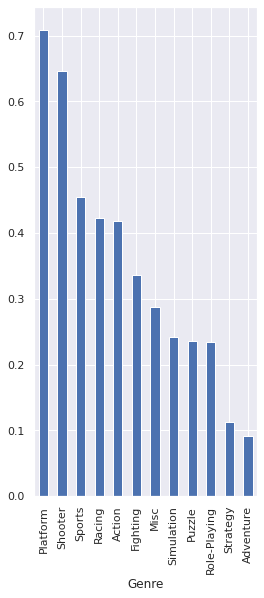

In [342]:
NA_ratio.plot(kind='bar')

In [343]:
# NA(북미지역)은 Platform, Shooter 장르를 선호

#### EU (유럽지역) ####

In [344]:
EU_ratio = df.groupby('Genre')['EU_Sales'].mean().sort_values(ascending=False)
EU_ratio

Genre
Shooter         0.347579
Platform        0.319040
Racing          0.280767
Sports          0.252916
Action          0.250406
Fighting        0.152198
Misc            0.152013
Simulation      0.150843
Role-Playing    0.134178
Puzzle          0.098226
Strategy        0.074624
Adventure       0.057423
Name: EU_Sales, dtype: float64

<AxesSubplot:xlabel='Genre'>

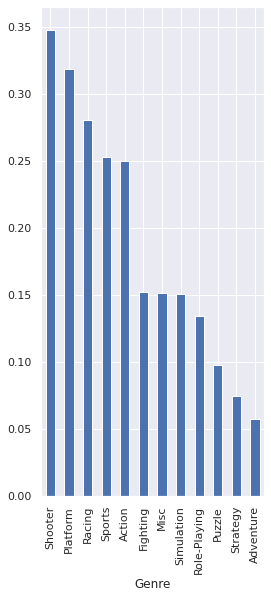

In [345]:
EU_ratio.plot(kind='bar')

In [346]:
# EU(유럽지역)은 Shooter, Platform 장르를 선호

#### JP (일본지역) ####

In [347]:
JP_ratio = df.groupby('Genre')['JP_Sales'].mean().sort_values(ascending=False)
JP_ratio

Genre
Role-Playing    0.255807
Platform        0.206752
Fighting        0.131847
Puzzle          0.109532
Sports          0.091958
Simulation      0.084953
Strategy        0.080234
Action          0.076095
Misc            0.075893
Racing          0.066451
Adventure       0.046824
Shooter         0.042240
Name: JP_Sales, dtype: float64

<AxesSubplot:xlabel='Genre'>

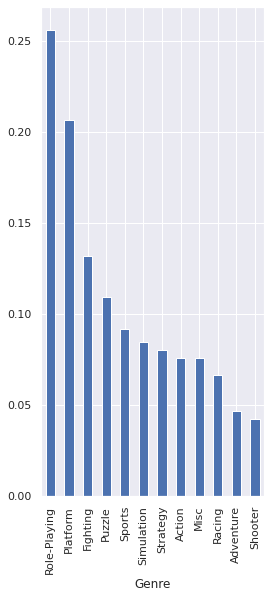

In [348]:
JP_ratio.plot(kind='bar')

In [349]:
# JP(일본지역)은 Role-Playing, Platform 장르를 선호

#### Other (기타지역) ####

In [350]:
Other_ratio = df.groupby('Genre')['Other_Sales'].mean().sort_values(ascending=False)
Other_ratio

Genre
Shooter         0.114050
Racing          0.091379
Sports          0.090137
Action          0.089731
Platform        0.081840
Fighting        0.055115
Misc            0.053060
Simulation      0.041821
Role-Playing    0.041636
Puzzle          0.024152
Strategy        0.018698
Adventure       0.015082
Name: Other_Sales, dtype: float64

<AxesSubplot:xlabel='Genre'>

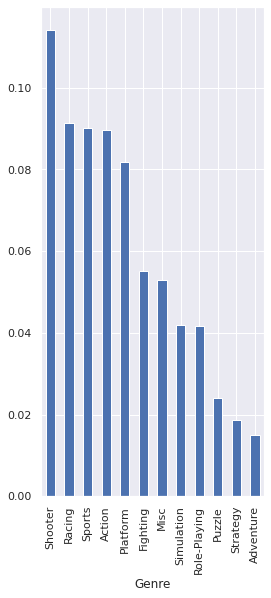

In [351]:
Other_ratio.plot(kind='bar')

In [352]:
# Other(기타지역)은 Shooter 장르를 선호

#### 그래프 ####

In [353]:
# 데이터를 한번에 나타내기 위해 같은 데이터프레임으로 만들어주기
NA_ratio = pd.DataFrame(NA_ratio)
EU_ratio = pd.DataFrame(EU_ratio)
JP_ratio = pd.DataFrame(JP_ratio)
Other_ratio = pd.DataFrame(Other_ratio)

ratio = pd.concat([NA_ratio, EU_ratio, JP_ratio, Other_ratio], axis=1)
ratio

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Platform,0.707888,0.319040,0.206752,0.081840
Shooter,0.645735,0.347579,0.042240,0.114050
Sports,0.454251,0.252916,0.091958,0.090137
Racing,0.423453,0.280767,0.066451,0.091379
Action,0.418182,0.250406,0.076095,0.089731
Fighting,0.335817,0.152198,0.131847,0.055115
Misc,0.288067,0.152013,0.075893,0.053060
Simulation,0.242329,0.150843,0.084953,0.041821
Puzzle,0.235848,0.098226,0.109532,0.024152


<AxesSubplot:title={'center':'Preference of game genre by region'}>

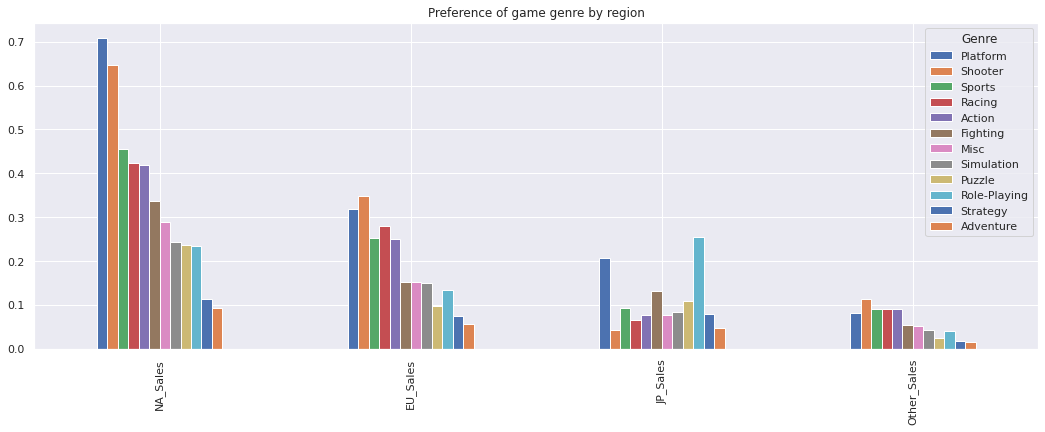

In [354]:
# 평균으로만 선호도 그래프 구하기
ratio.T.plot(kind='bar', figsize=(18, 6), title="Preference of game genre by region")

In [355]:
# NA (북미지역) : Platform, Shooter
# EU (유럽지역) : Shooter, Platform
# JP (일본지역) : Role-Playing, Platform
# Other (기타지역) : 대체적으로 비슷

### 2) 나라에 따른 장르 선호도 ###

##### NA (북미지역) #####

<AxesSubplot:title={'center':'Preference Ratio of NA_Sales'}, ylabel='NA_Sales'>

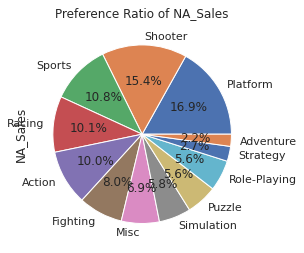

In [356]:
((ratio['NA_Sales']/ratio.sum(axis=0)[0])).plot(kind='pie',autopct='%.1f%%', title="Preference Ratio of NA_Sales")

In [357]:
# Platform, Shooter, Sports, Racing : 비율의 절반 차지

##### EU (유럽지역) #####

<AxesSubplot:title={'center':'Preference Ratio of EU_Sales'}, ylabel='EU_Sales'>

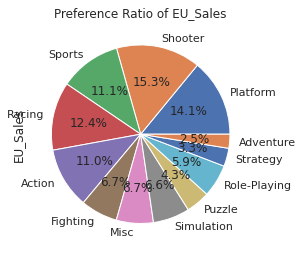

In [358]:
((ratio['EU_Sales']/ratio.sum(axis=0)[1])).plot(kind='pie',autopct='%.1f%%', title="Preference Ratio of EU_Sales")

In [359]:
# Shooter, Platform, Racing, Sports : 비율의 절반 차지

##### JP (일본지역) #####

<AxesSubplot:title={'center':'Preference Ratio of JP_Sales'}, ylabel='JP_Sales'>

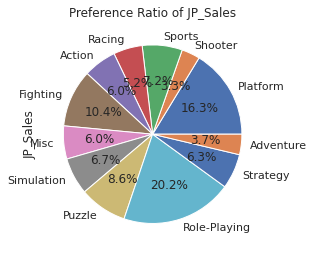

In [360]:
((ratio['JP_Sales']/ratio.sum(axis=0)[2])).plot(kind='pie',autopct='%.1f%%', title="Preference Ratio of JP_Sales")

In [361]:
# Role-Playing, Platform, Fighting, Puzzle : 비율의 절반 차지

##### Other (기타지역) #####

<AxesSubplot:title={'center':'Preference Ratio of Other_Sales'}, ylabel='Other_Sales'>

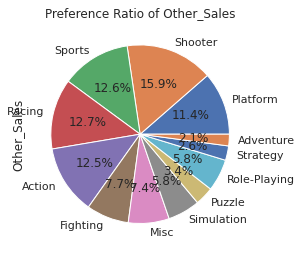

In [362]:
((ratio['Other_Sales']/ratio.sum(axis=0)[3])).plot(kind='pie',autopct='%.1f%%', title="Preference Ratio of Other_Sales")

In [363]:
# Shooter, Racing, Sports, Action : 비율의 절반 차지

#### 결과 ####

In [364]:
# NA(북미지역) : Platform, Shooter, Sports, Racing
# EU(유럽지역) : Shooter, Platform, Racing, Sports
# JP(일본지역) : Role-Playing, Platform, Fighting, Puzzle
# Other(기타지역) : Shooter, Racing, Sports, Action

# >> 지역별로 선호하는 게임의 장르가 Platform, Shooter, Racing, Sports로 비슷하다고 생각

In [365]:
# Q1) 지역은 어떻게 구분했나요?
# A1) NA, EU, JP, Other로 구분

# Q2) 지역별로 선호하는 게임의 장르를 파악했나요?
# A2) NA(북미지역) : Platform, Shooter, Sports, Racing
#     EU(유럽지역) : Shooter, Platform, Racing, Sports
#     JP(일본지역) : Role-Playing, Platform, Fighting, Puzzle
#     Other(기타지역) : Shooter, Racing, Sports, Action
# >>> 지역에 관계없이 대체적으로 Platform, Shooter, Racing, Sports 장르를 선호하는 것 같다. (단, 일본은 Role-Playing, Platform, Fighting, Puzzle 장르 선호)

# Q3) 지역별로 선호하는 게임의 장르가 왜 같다고 생각했나요?
# A3) 거의 모든 지역에서 절반에 해당하는 비율에 Platform, Shooter, Racing, Sports 장르가 있기 때문

### 3) 연도별 게임의 트렌드 ###

#### 연간 장르별 게임 출시량 ####

In [366]:
df1 = df.copy()
df1['number_of_game'] = 1
df1

,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,number_of_game
0,The Munchables,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,1
1,Otome wa Oanesama Boku ni Koi Shiteru Portable,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,1
2,Deal or No Deal: Special Edition,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,1
3,Power Pro Kun Pocket 8,2005,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00,0.14,1
4,Samurai Warriors: State of War,2005,Action,Tecmo Koei,0.07,0.00,0.11,0.01,0.19,1
...,...,...,...,...,...,...,...,...,...,...
12141,iCarly,2009,Adventure,Activision,1.09,0.01,0.00,0.08,1.18,1
12142,iCarly 2: iJoin The Click!,2010,Adventure,Activision,0.34,0.02,0.00,0.03,0.39,1
12143,nail'd,2010,Racing,Deep Silver,0.16,0.04,0.00,0.03,0.23,1
12144,pro evolution soccer 2011,2010,Sports,Konami Digital Entertainment,0.55,2.28,0.91,0.78,4.52,1


In [367]:
# 게임출시량을 기준으로 연간 출시된게임의 최다장르 구하기
year_max_genre = df1.groupby(['Year', 'Genre'])['number_of_game'].sum().reset_index()
year_max_genre

,Year,Genre,number_of_game
0,1980,Action,1
1,1980,Fighting,1
2,1980,Misc,4
3,1980,Shooter,2
4,1981,Action,25
...,...,...,...
383,2016,Sports,15
384,2016,Strategy,8
385,2017,Action,1
386,2017,Role-Playing,1


In [368]:
condition = year_max_genre['number_of_game'] == year_max_genre.groupby(['Year'])['number_of_game'].transform(max)
year_max_genre = year_max_genre[condition]
year_max_genre.columns = ['Year', 'Genre', 'number_of_game']
year_max_genre.reset_index(drop=True)

,Year,Genre,number_of_game
0,1980,Misc,4
1,1981,Action,25
2,1982,Action,18
3,1983,Action,7
4,1984,Puzzle,3
5,1984,Racing,3
6,1984,Shooter,3
7,1985,Platform,4
8,1985,Puzzle,4
9,1986,Action,6


Text(0.5, 1.0, 'Number of Released Genre by Year')

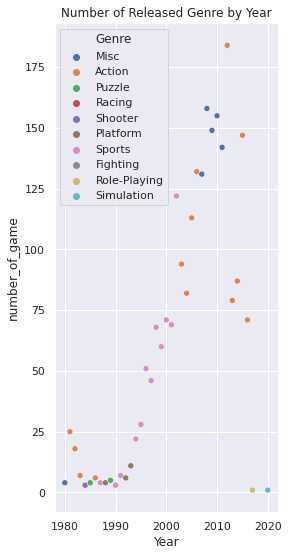

In [369]:
sns.scatterplot(x='Year', y='number_of_game', data=year_max_genre, hue='Genre')
plt.title('Number of Released Genre by Year')

In [370]:
# 1990년대엔 Sports 장르가 많이 출시되었지만, 2000년대 초반부턴 Action 장르가 많이 출시됨

#### 연간 최대출고량 ####

In [371]:
# 총 출고량을 기준으로 연간 최대출고량 구하기
year_max_sales = df.groupby(['Year', 'Genre'])['Total_Sales'].sum().reset_index()
year_max_sales

,Year,Genre,Total_Sales
0,1980,Action,0.34
1,1980,Fighting,0.77
2,1980,Misc,2.70
3,1980,Shooter,7.07
4,1981,Action,14.79
...,...,...,...
383,2016,Sports,14.46
384,2016,Strategy,0.52
385,2017,Action,0.01
386,2017,Role-Playing,0.04


In [372]:
condition = year_max_sales['Total_Sales'] == year_max_sales.groupby(['Year'])['Total_Sales'].transform(max)
year_max_sales = year_max_sales[condition]
year_max_sales.columns = ['Year', 'Genre', 'Total_Sales']
year_max_sales.reset_index(drop=True)

,Year,Genre,Total_Sales
0,1980,Shooter,7.07
1,1981,Action,14.79
2,1982,Puzzle,10.04
3,1983,Platform,6.93
4,1984,Shooter,31.10
5,1985,Platform,43.17
6,1986,Action,13.74
7,1987,Fighting,5.42
8,1988,Platform,27.73
9,1989,Puzzle,37.75


Text(0.5, 1.0, 'Max Sales by Year')

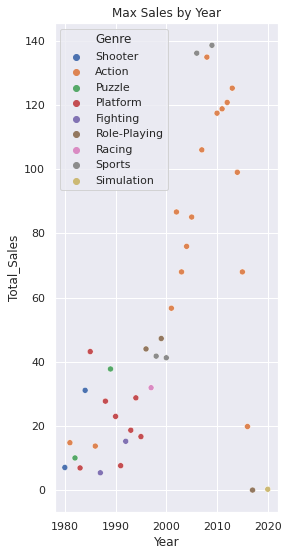

In [373]:
sns.scatterplot(x='Year', y='Total_Sales', data=year_max_sales, hue='Genre')
plt.title('Max Sales by Year')

In [374]:
# 1990년대 초중반엔 Platform 장르가 유행했지만, 2000년대 초반부턴 Action 장르가 유행하는 것으로 판단됨

#### 결과 ####

In [375]:
# 1990년대엔 Sports 장르가 많이 출시되었지만, 2000년대 초반부턴 Action 장르가 많이 출시됨

# 1990년대 초중반엔 Platform 장르가 유행했지만, 2000년대 초반부턴 Action 장르가 유행하는 것으로 판단됨

In [376]:
# Q1) 트렌드는 어떤 것을 기준으로 파악했나요?
# A1) 당해에 출고량이 높은 기준으로 파악

# Q2) 연도별로 트렌드가 존재하나요?
# A2) 1990년대 : Platform 장르 유행, 2000년대~ : Action 장르 유행

### 4) 인기가 많은 게임에 대한 분석 및 시각화 프로세스 ###

#### 인기가 많은 게임 ####

In [377]:
df['Total_Sales'].describe()

count    12146.000000
mean         0.715487
std          2.052205
min          0.010000
25%          0.060000
50%          0.180000
75%          0.570000
max         82.740000
Name: Total_Sales, dtype: float64

In [378]:
# 총 출고량이 백만개 >> 인기있는 게임이라고 생각 (약 16.57프로)
df.query('Total_Sales > 1').shape[0] / df.shape[0] * 100

16.556891157582744

In [379]:
# 인기있는 게임을 새로운 변수에 저장
popular = df.query('Total_Sales > 1')

#### 인기가 많은 게임 분석 및 시각화 ####

##### by 장르 #####

<AxesSubplot:title={'center':'Popular Games by Genre'}, ylabel='Genre'>

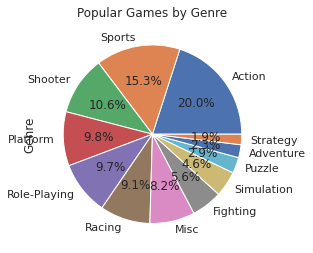

In [380]:
# 장르에 따른 인기가 많은 게임의 백분율 계산
popular['Genre'].value_counts().plot(kind='pie', autopct='%.1f%%', title='Popular Games by Genre')

In [381]:
# Action >> Sports >> Shooter >> Platform >> Role-Playing >> Racing 순으로 약 75%를 차지

##### by 최근 연도 #####

In [382]:
# 데이터가 부족한 2017년을 제외한 2012~2016년도 : 최근 5년 간 인기있는 게임으로 정의
latest_5_pop = popular.query('2012 <= Year <= 2016')

<AxesSubplot:title={'center':'Last-5-years Popular Games by Genre'}, ylabel='Genre'>

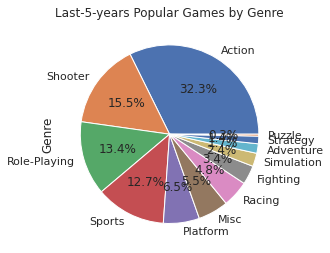

In [383]:
# 최근 5년간의 인기있는 게임 장르 파악
latest_5_pop['Genre'].value_counts().plot(kind='pie', autopct='%.1f%%', title='Last-5-years Popular Games by Genre')

In [384]:
# Action, Shooter, Role-Playing, Sports가 74%를 차지

#### 결과 ####

In [385]:
# Q1) 인기가 많다는 것을 어떻게 정의했나요?
# A1) 게임 별 총 출고량을 구하고, 총 출고량이 백만(1) 이상인 값으로 정의

# Q2) 해당 게임이 왜 인기가 많다고 생각했나요?
# A2) 출고량이 많기 때문

# Q3) 시각화를 통해 무엇을 나타내고자 하는지를 고려했나요?
# A3) 인기가 많은 게임 중 장르(Genre)에 따른 게임의 백분율과, 최근(5년)동안 출고량이 높은 게임에 따른 백분율을 나타내는 원형그래프를 그렸다.

# Q4) 해당 분석을 통해 어떤 인사이트를 도출할 수 있나요?
# A4) 장르(Genre)에 따른 인기가 많은 게임 : Action, Sports, Shooter, Platform, Role-Playing, Racing 순으로 총 75%를 차지
#     최근(5년)동안 출고량이 높은 게임 : Action, Shooter, Role-Playing, Sports가 74%를 차지

# >> Action, Sports, Shooter, Role-Playing 중 하나를 만들면 될 것 같다.

## **3. 결과** ##

In [386]:
# 2-1,2에서의 결과 : 지역별로 선호하는 게임의 장르가 Platform, Shooter, Racing, Sports로 비슷
#                   (단, 일본은 Role-Playing 선호 ↑)

# 2-3에서의 결과 : 장르별 연간 출시된 게임 개수 : 1990년대 : Sports 장르 출시 多, 2000년대~ : Action 장르 출시 多
#                  장르별 연간 최대 출고량 : 1990년대 초중반 : Platform, 2000년대~ : Action

# 2-4에서의 결과 : 장르(Genre)에 따른 인기가 많은 게임 : Action, Sports, Shooter, Platform, Role-Playing, Racing가 75%를 차지
#                  최근(5년)동안 출고량이 높은 게임 : Action, Shooter, Role-Playing, Sports가 74%를 차지
#                  >> Action, Sports, Shooter, Role-Playing

### 결론 ##

In [387]:
# 최근 5년간의 출고량을 반영하여 Action, Sports, Shooter, Role-Playing의 장르 중 하나를 만들면 좋을 것 같다.

# Action :
# 출고량이 높은 게임장르 중 20%, 최근 5년간 인기있는 게임의 32.2을 차지 → 높은 비율임
# 2-2에서의 결과에서도 알 수 있듯이 현재 트렌드임


# Sports :
# 출고량이 높은 게임장르 중 15.3%, 최근 5년간 인기있는 게임의 13%를 차지
# 2-4 결과 모두에 존재


# Shooter :
# 출고량이 높은 게임장르 중 10.6%, 최근 5년간 인기있는 게임의 15.4%를 차지
# 2-4 결과 모두에 존재


# Role-Playing :
# 출고량이 높은 게임장르 중 9.7%, 최근 5년간 인기있는 게임의 13.4%를 차지
# 2-3 결과 모두에 존재
# 하지만 2-1에서 알 수 있듯이, 일본지역에서의 출고율이 높은 편 >> 일본을 대상으로 게임을 만들면 괜찮은 결과를 얻을 것으로 판단

## **4. 각 장르의 성공 확률** ##

### 데이터 설정 ###

In [388]:
# 최근 5년간의 데이터로 설정
latest_5 = df.query('2012 <= Year <= 2016')

#### Action ###

In [389]:
# Action 장르 게임의 성공 확률
latest_5_pop.query('Genre == "Action"').shape[0] / latest_5.query('Genre == "Action"').shape[0] * 100

16.549295774647888

#### Sports ###

In [390]:
# Action 장르 게임의 성공 확률
latest_5_pop.query('Genre == "Sports"').shape[0] / latest_5.query('Genre == "Sports"').shape[0] * 100

37.37373737373738

#### Shooter ###

In [391]:
# Shooter 장르 게임의 성공 확률
latest_5_pop.query('Genre == "Shooter"').shape[0] / latest_5.query('Genre == "Shooter"').shape[0] * 100

49.45054945054945

#### Role-Playing ###

In [392]:
# Role-Playing 장르 게임의 성공 확률
latest_5_pop.query('Genre == "Role-Playing"').shape[0] / latest_5.query('Genre == "Role-Playing"').shape[0] * 100

14.130434782608695

## **5. 최종 결론** ##

In [393]:
# Shooter 장르 게임의 성공 확률이 49.45%로 가장 높은것으로 확인됨

In [ ]:
# 만약 회사 규모가 작다면 안전하게 성공할 확률이 높은 게임으로 결정
# (레드오션인 Action 장르보다 블루오션인 Shooter 장르로 선택)

# >> Shooter 장르 제작

In [ ]:
# 만약 회사 규모가 크다면 유행성도 높고 판매량도 높은 게임으로 결정

# >> Action 장르 제작